In [4]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [5]:
# Read the CSV file from the Resources folder into a Pandas DataFrame

df = pd.read_csv("Resources/lending_data.csv")

# Review the DataFrame
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [6]:
df["loan_status"].value_counts(normalize=True)

loan_status
0    0.967757
1    0.032243
Name: proportion, dtype: float64

In [7]:
df["loan_status"].value_counts()

loan_status
0    75036
1     2500
Name: count, dtype: int64

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [8]:
df.columns

Index(['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt', 'loan_status'],
      dtype='object')

In [9]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df['loan_status']
# Separate the X variable, the features
x = df[df.columns]


In [10]:
# Review the y variable Series
y

0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64

In [11]:
# Review the X variable DataFrame
x

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [12]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)

In [13]:
x_train

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
56666,9000.0,6.954,46000,0.347826,3,0,16000,0
52050,10700.0,7.688,52900,0.432892,5,1,22900,0
21398,10100.0,7.410,50300,0.403579,4,1,20300,0
4965,10100.0,7.437,50600,0.407115,4,1,20600,0
7739,8600.0,6.785,44500,0.325843,3,0,14500,0
...,...,...,...,...,...,...,...,...
20609,7200.0,6.177,38700,0.224806,1,0,8700,0
21440,10000.0,7.389,50100,0.401198,4,1,20100,0
73349,10200.0,7.463,50800,0.409449,4,1,20800,0
50057,11100.0,7.838,54400,0.448529,5,1,24400,0


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [14]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(random_state=1)

# Fit the model using training data
model.fit(x_train, y_train.values.ravel())

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [15]:
# Make a prediction using the testing data
y_predict = model.predict(x_test)

In [16]:
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [17]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

mat = confusion_matrix(y_test, y_predict)
print("Confusion Matrix")
print(mat)

Confusion Matrix
[[7477    0]
 [   0  277]]


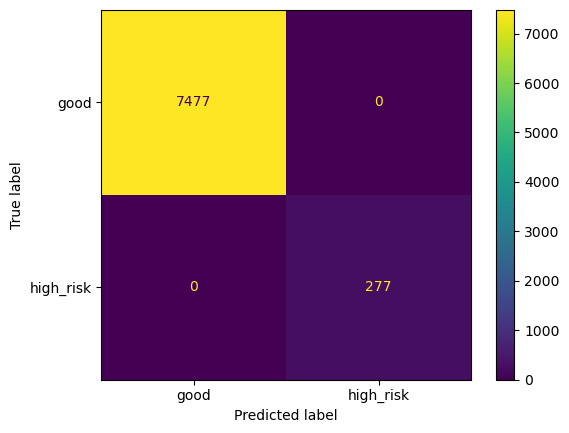

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict,display_labels=['good', 'high_risk'])

In [19]:
# Print the classification report for the model
# question: How well does the logistic regression model predict 
# both the 0 (healthy loan) and 1 (high-risk loan) labels? (5 points)
from sklearn.metrics import classification_report
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7477
           1       1.00      1.00      1.00       277

    accuracy                           1.00      7754
   macro avg       1.00      1.00      1.00      7754
weighted avg       1.00      1.00      1.00      7754



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The model is very capable of predicting healthy loans with almost perfect precision and recall. The model labels loans as low-risk, which makes lenders confident in approving them.

---